
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

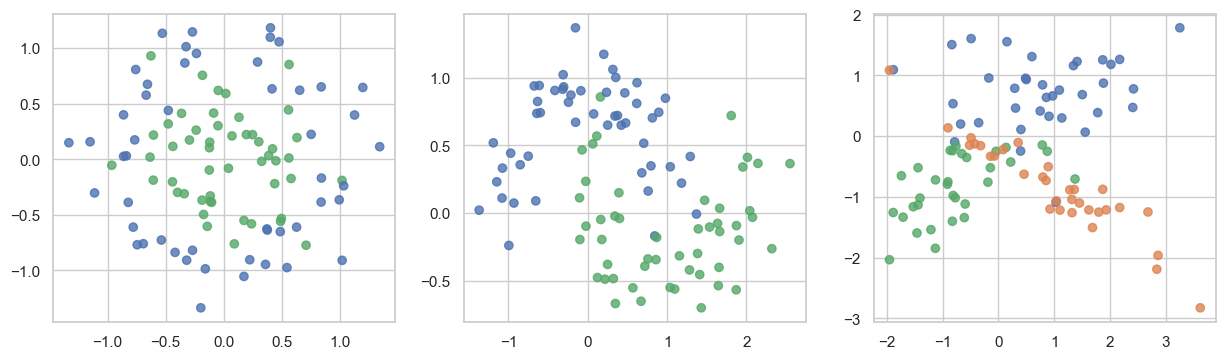

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [7]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

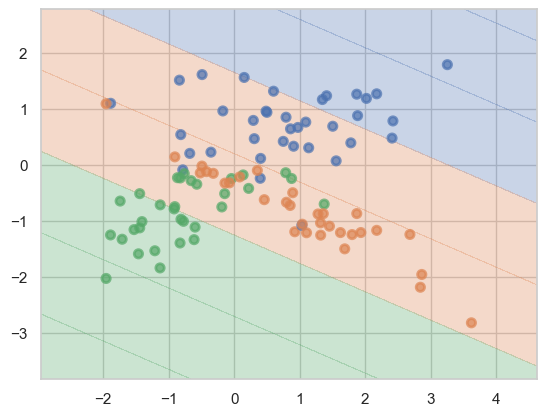

In [8]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1: Train Accuracy = 1.0000, Test Accuracy = 0.7333


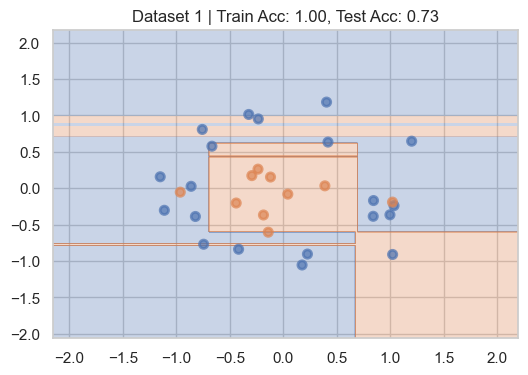

Dataset 2: Train Accuracy = 1.0000, Test Accuracy = 0.8667


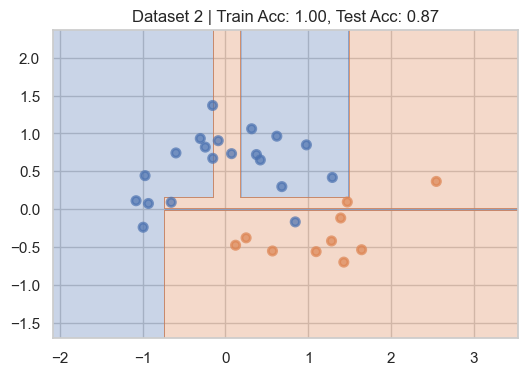

Dataset 3: Train Accuracy = 1.0000, Test Accuracy = 0.8333


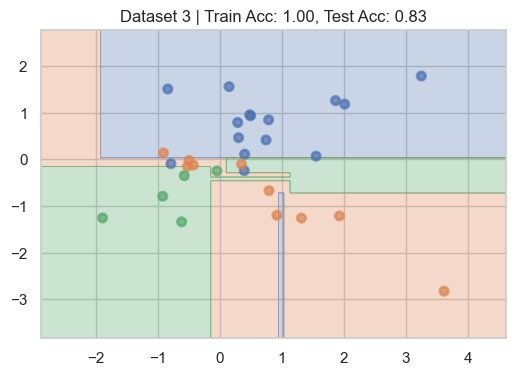

In [9]:
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)

    print(f"Dataset {i+1}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")

    plt.figure(figsize=(6, 4))
    plot_surface(clf, X_test, y_test)
    plt.title(f"Dataset {i+1} | Train Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}")
    plt.show()

__Ответ:__ На удивление, не так уж и сильно переобучились, хотя проблемы присутствуют

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


--------------------------------------------------
Датасет 1
--------------------------------------------------


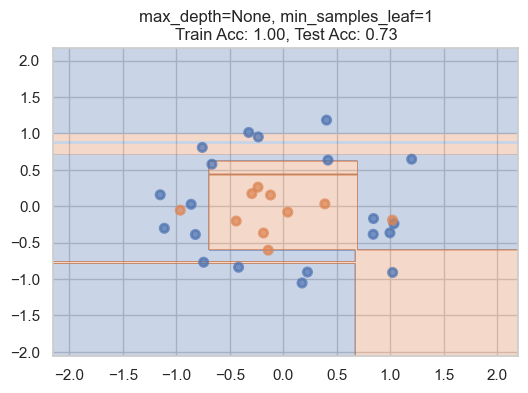

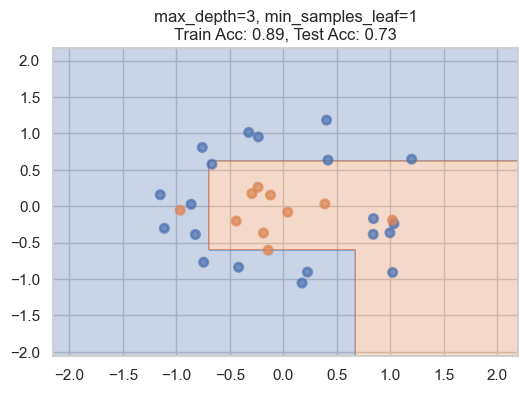

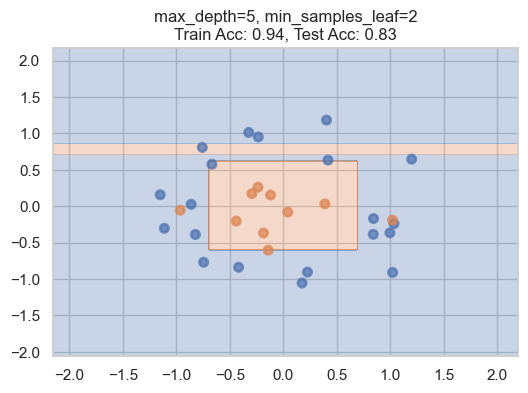

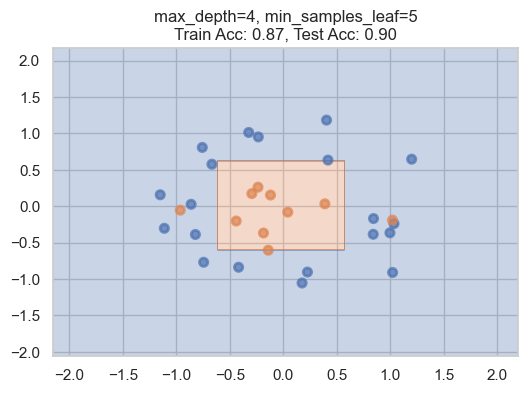


--------------------------------------------------
Датасет 2
--------------------------------------------------


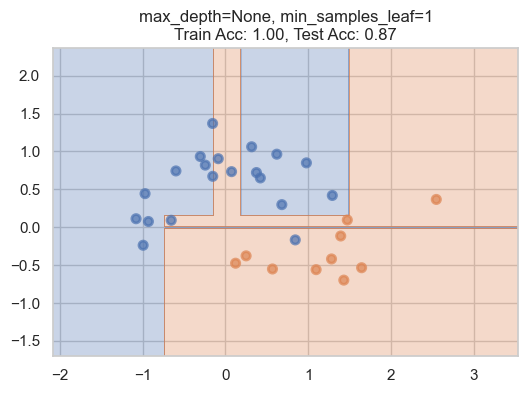

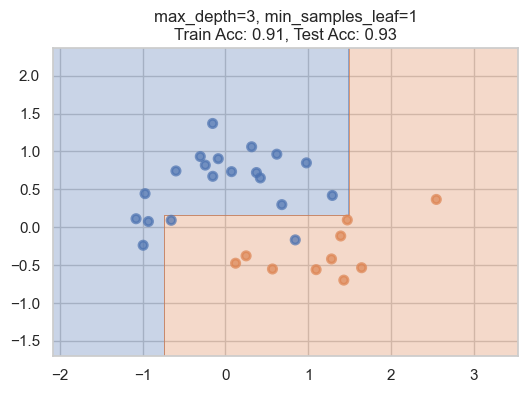

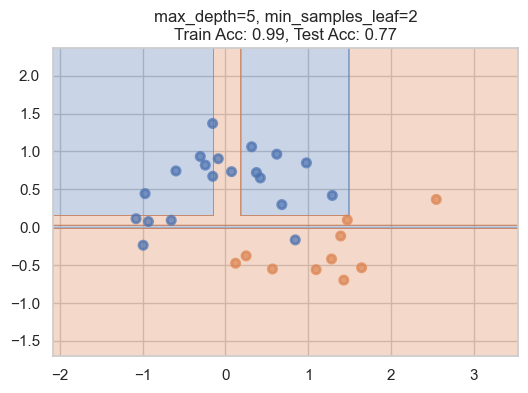

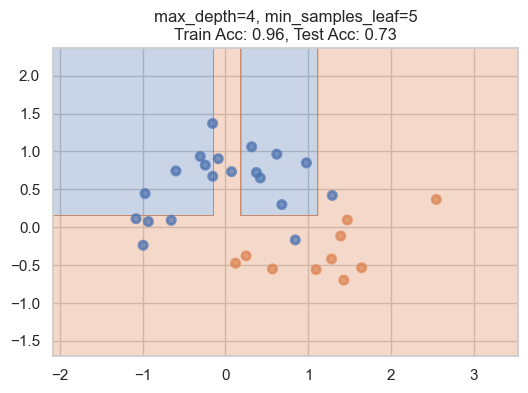


--------------------------------------------------
Датасет 3
--------------------------------------------------


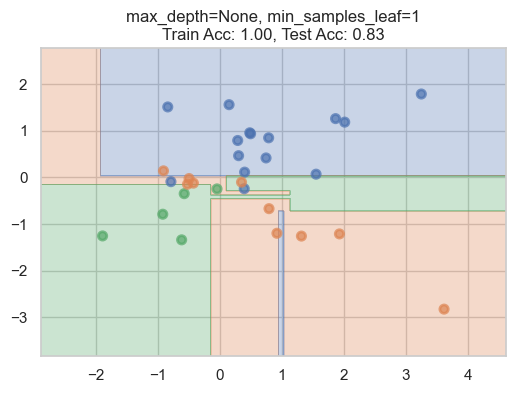

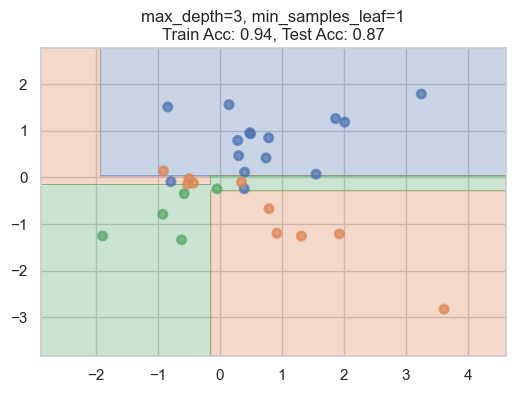

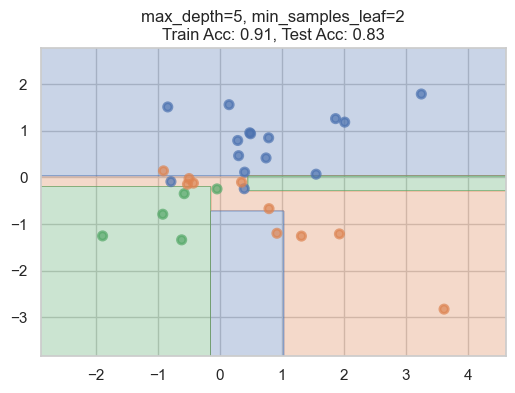

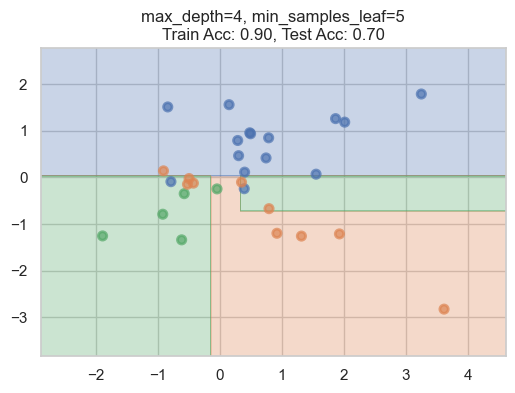

In [10]:
params_grid = [
    {"max_depth": None, "min_samples_leaf": 1},
    {"max_depth": 3, "min_samples_leaf": 1},
    {"max_depth": 5, "min_samples_leaf": 2},
    {"max_depth": 4, "min_samples_leaf": 5},
]

for d_idx, (X, y) in enumerate(datasets):
    print(f"\n{'-' * 50}\nДатасет {d_idx+1}\n{'-' * 50}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for param in params_grid:
        clf = DecisionTreeClassifier(**param, random_state=42)
        clf.fit(X_train, y_train)

        train_acc = clf.score(X_train, y_train)
        test_acc = clf.score(X_test, y_test)

        plt.figure(figsize=(6, 4))
        plot_surface(clf, X_test, y_test)
        plt.title(f"max_depth={param['max_depth']}, min_samples_leaf={param['min_samples_leaf']}\n"
                  f"Train Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}")
        plt.show()

__Ответ:__ С увеличением глубины модель начинает лучше работать

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

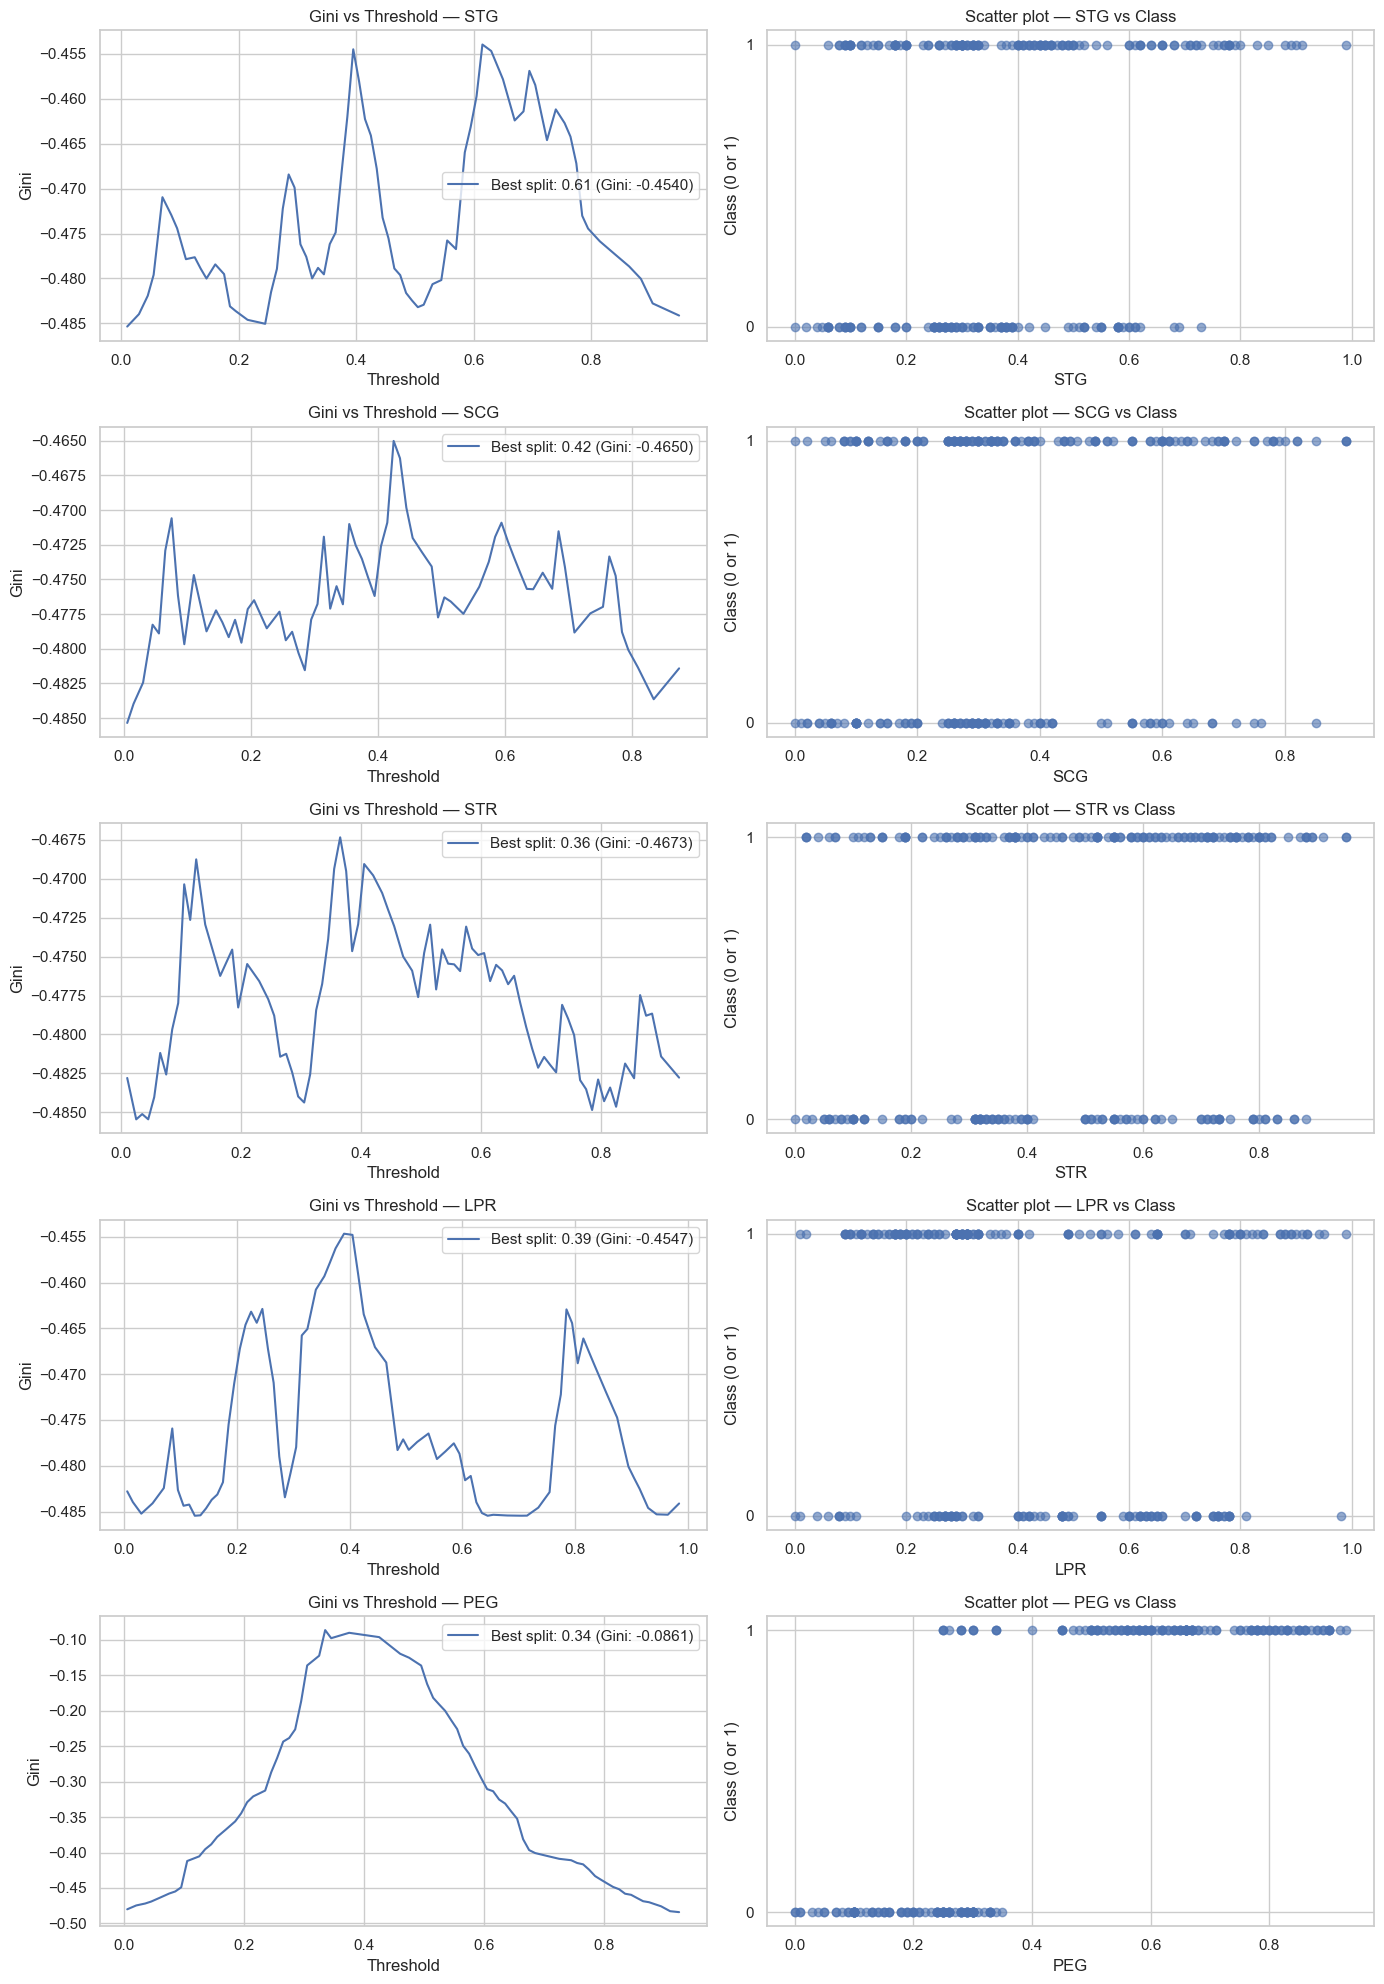

In [ ]:
from tree_code import find_best_split 
df = pd.read_csv('students.csv')
X = df.iloc[:, :5].values
y = df.iloc[:, -1].values

feature_names = df.columns[:5]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))

for i in range(5):
    feature_vector = X[:, i]
    target_vector = y

    thresholds, ginis, threshold_best, gini_best = find_best_split(feature_vector, target_vector)

    if thresholds is not None:
        axes[i, 0].plot(thresholds, ginis, label=f'Best split: {threshold_best:.2f} (Gini: {gini_best:.4f})')
        axes[i, 0].set_title(f'Gini vs Threshold — {feature_names[i]}')
        axes[i, 0].set_xlabel('Threshold')
        axes[i, 0].set_ylabel('Gini')
        axes[i, 0].legend()
        axes[i, 0].grid(True)

    axes[i, 1].scatter(feature_vector, target_vector, alpha=0.6)
    axes[i, 1].set_title(f'Scatter plot — {feature_names[i]} vs Class')
    axes[i, 1].set_xlabel(f'{feature_names[i]}')
    axes[i, 1].set_ylabel('Class (0 or 1)')
    axes[i, 1].set_yticks([0, 1])
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** 

1. Лучший признак для разделения выборки — это STG
2. Да, при значениях STG меньше 0.61 , преобладают объекты класса 0 , а при значениях больше 0.61 , преобладают объекты класса 1
3. Вид кривой для "хороших" признаков. Кривая критерия Джини имеет чёткий пик с высоким значением (близким к -0.5). Это означает, что существует порог, который эффективно разделяет классы. После пика кривая обычно плавно убывает, что указывает на то, что другие пороги менее эффективны для разделения.
4. Вид кривой для "плохих" признаков. Кривая критерия Джини имеет низкий максимум или вообще отсутствует чёткий пик. Это означает, что ни один порог не может эффективно разделить классы. Кривая может быть плоской или иметь небольшие колебания, что указывает на то, что признак несёт мало информации для разделения классов.

5. Отличия кривых "хороших" и "плохих" признаков**

| **Характеристика**               | **Хорошие признаки**                          | **Плохие признаки**                          |
|-----------------------------------|-----------------------------------------------|---------------------------------------------|
| **Максимальное значение Джини**   | Высокое (близко к -0.5)                       | Низкое (далеко от -0.5)                     |
| **Форма кривой**                  | Чёткий пик с высоким Джини                   | Плоская или небольшие колебания             |
| **Порог разделения**              | Один или несколько чётких порогов             | Нет чётких порогов                          |
| **Scatter-график**                | Классы хорошо разделяются по порогу           | Классы переплетаются                        |


__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




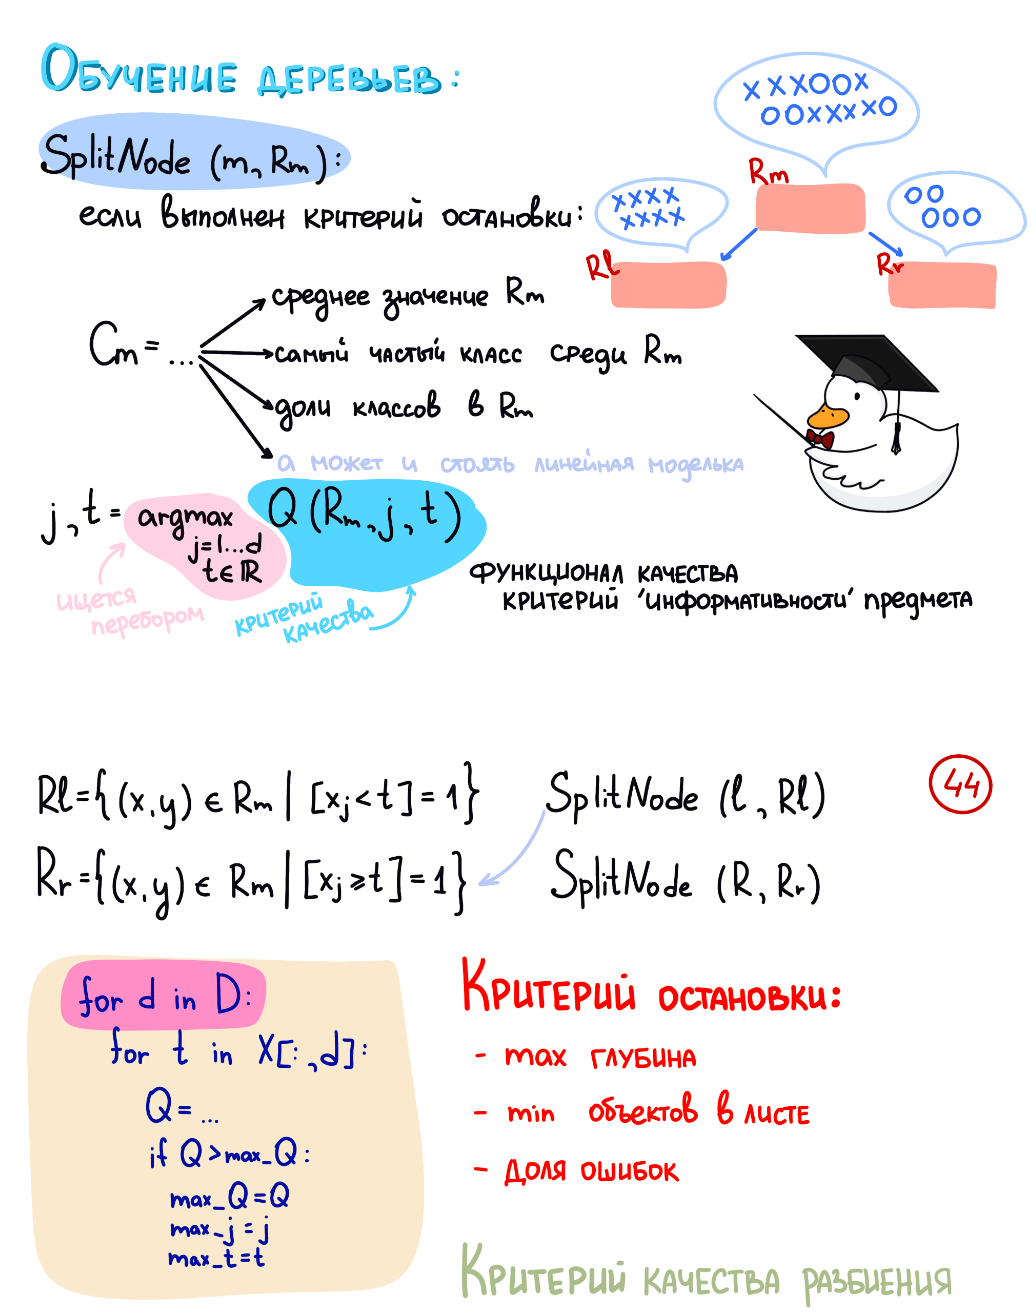

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tree_code import DecisionTree

columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

df = pd.read_csv("agaricus-lepiota.data", header=None, names=columns)

# Целевая переменная: e -> 0 (съедобный), p -> 1 (ядовитый)
X = df.drop('class', axis=1).values
y = df['class'].apply(lambda x: 0 if x == 'e' else 1).values

for i in range(X.shape[1]):
    le = LabelEncoder()
    X[:, i] = le.fit_transform(X[:, i])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

feature_types = ["categorical"] * X.shape[1]
tree = DecisionTree(feature_types=feature_types, max_depth=5)
tree.fit(X_train, y_train)

preds = tree.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9993


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [ ]:
from collections import Counter
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
 
# Чуть-чуть переделал, проще было вручную сюда вытащить для правок
def find_best_split(feature_vector, target_vector):
    assert len(feature_vector) == len(target_vector)
    sorted_indices = np.argsort(feature_vector)
    feature_sorted = feature_vector[sorted_indices]
    target_sorted = target_vector[sorted_indices]

    diff_indices = np.where(feature_sorted[:-1] != feature_sorted[1:])[0]
    if len(diff_indices) == 0:
        return None, None, None, -np.inf

    thresholds = (feature_sorted[diff_indices] + feature_sorted[diff_indices + 1]) / 2
    ginis = []

    for threshold in thresholds:
        left_mask = feature_sorted < threshold
        right_mask = ~left_mask
        n_left = np.sum(left_mask)
        n_right = np.sum(right_mask)
        n_total = len(target_sorted)

        if n_left == 0 or n_right == 0:
            ginis.append(-np.inf)
            continue

        p1_left = np.mean(target_sorted[left_mask])
        p0_left = 1 - p1_left
        h_left = 1 - p1_left**2 - p0_left**2

        p1_right = np.mean(target_sorted[right_mask])
        p0_right = 1 - p1_right
        h_right = 1 - p1_right**2 - p0_right**2

        gini = -(n_left / n_total) * h_left - (n_right / n_total) * h_right
        ginis.append(gini)

    best_idx = np.argmax(ginis)
    return thresholds, ginis, thresholds[best_idx], ginis[best_idx]


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=2):
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._tree = {}

    def _fit_node(self, sub_X, sub_y, node, depth=0):
        if len(sub_y) == 0:
            node["type"] = "terminal"
            node["class"] = int(Counter(sub_y).most_common(1)[0][0])
            return

        unique_classes = np.unique(sub_y)
        if len(unique_classes) == 1:
            node["type"] = "terminal"
            node["class"] = int(unique_classes[0])
            return

        if (self._max_depth is not None and depth >= self._max_depth) or len(sub_X) < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = int(Counter(sub_y).most_common(1)[0][0])
            return

        best_gini = -np.inf
        best_feature = None
        best_threshold = None
        best_categories = None
        best_split = None
        category_index_best = None

        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            if feature_type == "real":
                feature_vector = sub_X[:, feature].astype(float)
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                pos_counts = Counter(sub_X[sub_y == 1, feature])
                ratio = {k: pos_counts.get(k, 0) / counts[k] for k in counts}
                categories_sorted = sorted(ratio, key=ratio.get)
                category_index = {cat: idx for idx, cat in enumerate(categories_sorted)}
                feature_vector = np.vectorize(category_index.get)(sub_X[:, feature])

            if len(np.unique(feature_vector)) <= 1:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini is None:
                continue

            if feature_type == "real":
                split = feature_vector < threshold
            else:
                split = np.isin(feature_vector, np.arange(threshold))

            if gini > best_gini:
                best_gini = gini
                best_feature = feature
                best_threshold = threshold
                if feature_type == "categorical":
                    best_categories = [cat for cat, idx in category_index.items() if idx < threshold]
                    category_index_best = category_index

        if best_feature is None:
            node["type"] = "terminal"
            node["class"] = int(Counter(sub_y).most_common(1)[0][0])
            return

        node["type"] = "nonterminal"
        node["feature"] = best_feature
        node["threshold"] = best_threshold
        if self._feature_types[best_feature] == "categorical":
            node["categories"] = best_categories

        if len(sub_X[split]) < self._min_samples_split or len(sub_X[~split]) < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = int(Counter(sub_y).most_common(1)[0][0])
            return

        try:
            node["left_child"] = {}
            node["right_child"] = {}
            self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
            self._fit_node(sub_X[~split], sub_y[~split], node["right_child"], depth + 1)
        except Exception as e:
            print(f"[ERROR] Критическая ошибка при обучении поддерева: {e}")
            node["type"] = "terminal"
            node["class"] = int(Counter(sub_y).most_common(1)[0][0])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def _predict_one(self, x, node):
        if node["type"] == "terminal":
            return node["class"]
        feature = node["feature"]
        feature_type = self._feature_types[feature]
        if feature_type == "real":
            if float(x[feature]) < node["threshold"]:
                return self._predict_one(x, node["left_child"])
            else:
                return self._predict_one(x, node["right_child"])
        elif feature_type == "categorical":
            if x[feature] in node.get("categories", []):
                return self._predict_one(x, node["left_child"])
            else:
                return self._predict_one(x, node["right_child"])

    def predict(self, X):
        return np.array([self._predict_one(x, self._tree) for x in X])


from sklearn.base import BaseEstimator

class CustomDecisionTreeWrapper(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=2):
        self.tree = DecisionTree(feature_types=feature_types,
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split)

    def fit(self, X, y):
        self.tree.fit(X, y)
        return self

    def predict(self, X):
        return self.tree.predict(X)

    def get_params(self, deep=True):
        return {
            "feature_types": self.tree._feature_types,
            "max_depth": self.tree._max_depth,
            "min_samples_split": self.tree._min_samples_split
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            if parameter == "feature_types":
                self.tree._feature_types = value
            elif parameter == "max_depth":
                self.tree._max_depth = value
            elif parameter == "min_samples_split":
                self.tree._min_samples_split = value
        return self


def evaluate_model(model, X, y):
    scorer = make_scorer(accuracy_score)
    try:
        scores = cross_val_score(model, X, y, cv=10, scoring=scorer)
        return scores.mean()
    except Exception as e:
        print(f"Ошибка при оценке модели: {e}")
        return np.nan


def load_mushrooms():
    columns = [
        'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
        'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
        'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
        'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
    ]
    df = pd.read_csv("agaricus-lepiota.data", header=None, names=columns)
    df.replace('?', np.nan, inplace=True)
    df.dropna(inplace=True)
    X = df.drop('class', axis=1).values
    y = df['class'].apply(lambda x: 0 if x == 'e' else 1).values
    for i in range(X.shape[1]):
        le = LabelEncoder()
        X[:, i] = le.fit_transform(X[:, i])
    return X.astype(int), y.astype(int)


def load_tic_tac_toe():
    df = pd.read_csv("tic-tac-toe-endgame.csv")
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].apply(lambda x: 1 if x == "positive" else 0).values
    for i in range(X.shape[1]):
        le = LabelEncoder()
        X[:, i] = le.fit_transform(X[:, i])
    return X.astype(int), y.astype(int)


def load_car():
    columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
    df = pd.read_csv("car.data", header=None, names=columns)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].apply(lambda x: 0 if x in ["unacc", "acc"] else 1).values
    for i in range(X.shape[1]):
        le = LabelEncoder()
        X[:, i] = le.fit_transform(X[:, i])
    return X.astype(int), y.astype(int)


def load_nursery():
    columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']
    df = pd.read_csv("nursery.data", header=None, names=columns)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].apply(lambda x: 0 if x in ['not_recom', 'recommend'] else 1).values
    for i in range(X.shape[1]):
        le = LabelEncoder()
        X[:, i] = le.fit_transform(X[:, i])
    return X.astype(int), y.astype(int)


datasets = {
    "Mushrooms": load_mushrooms(),
    "Tic-Tac-Toe": load_tic_tac_toe(),
    "Car Evaluation": load_car(),
    "Nursery": load_nursery()
}

results = []
for name, (X, y) in datasets.items():
    n_features = X.shape[1]
    print(f"\nProcessing dataset: {name}")

    model1 = CustomDecisionTreeWrapper(feature_types=["real"] * n_features)
    acc1 = evaluate_model(model1, X, y)

    model2 = CustomDecisionTreeWrapper(feature_types=["categorical"] * n_features)
    acc2 = evaluate_model(model2, X, y)

    preprocessor = ColumnTransformer([
        ('onehot', OneHotEncoder(sparse_output=False), list(range(n_features)))
    ])
    pipeline3 = Pipeline([
        ('preprocessor', preprocessor),
        ('tree', DecisionTreeClassifier())
    ])
    acc3 = evaluate_model(pipeline3, X, y)

    model4 = DecisionTreeClassifier()
    acc4 = evaluate_model(model4, X, y)

    results.append({
        "Dataset": name,
        "Custom Tree (Real)": acc1,
        "Custom Tree (Categorical)": acc2,
        "Custom Tree + One-Hot": acc3,
        "Sklearn Tree": acc4
    })

results_df = pd.DataFrame(results)
results_df.set_index("Dataset", inplace=True)
print("\nAccuracy Results:")
print(results_df.round(4))


Processing dataset: Mushrooms

Processing dataset: Tic-Tac-Toe

Processing dataset: Car Evaluation

Processing dataset: Nursery

Accuracy Results:
                Custom Tree (Real)  Custom Tree (Categorical)  \
Dataset                                                         
Mushrooms                   0.6313                     0.3731   
Tic-Tac-Toe                 0.5167                     0.6311   
Car Evaluation              0.9026                     0.4777   
Nursery                     0.9998                     0.9332   

                Custom Tree + One-Hot  Sklearn Tree  
Dataset                                              
Mushrooms                         NaN        0.9830  
Tic-Tac-Toe                    0.8165        0.7936  
Car Evaluation                 0.8203        0.9433  
Nursery                        0.9998        0.9997  


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


1. Различается по датасетам. Sklearn Tree работает лучше и стабильнее, Custom Tree (Real) - работает нестабильно, на 2/4 данных работает хорошо. Custom Tree (Categorical) - отрабатывает еще хуже. Custom Tree + One-Hot улучшает ситуацию, но все равно не лучше, чем Sklearn Tree. Это происходит из-за того, что где-то данные просто категориальные, где-то упорядоченные и категориальные
2. Да, есть случайная компонента , особенно в поведении моей реализации дерева. Точнее: Пороги разбиения в find_best_split, категориальный сплит через среднее значение таргета, нестабильная работа cross_val_score
3. 
- Установить ограничения на глубину и размер подвыборки
- Регуляризация через увеличение min_samples_leaf и min_impurity_decrease.
- Улучшить обработку категориальных признаков

# Как дела?

Да вроде норм, майские, правда, выбили из колеи. \
У Вас как? Как Вам новая команда в Авито?